In [71]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
def calculate_volume(size):
    vol = (4/3)*np.pi*(((size*10**-9)/2)**3)
    return vol

In [31]:
def calculate_Hk(Ku, Ms0):
    mu0 = 4*np.pi*10**-7
    Hk = (2*Ku)/(mu0*Ms0)
    return Hk

In [66]:
def tau12(v, Ms, Hk, T):
    tau0 = 10**-9
    kb = 1.38*10**-23
    mu0 = 4*np.pi*10**-7
    tau12 = tau0*np.exp((mu0*v*Ms*Hk)/(2*kb*T)*((1-(H0/Hk))**2))
    return tau12

def tau21(v, Ms, Hk, T):
    tau0 = 10**-9
    kb = 1.38*10**-23
    mu0 = 4*np.pi*10**-7
    tau21 = tau0*np.exp((mu0*v*Ms*Hk)/(2*kb*T)*((1+(H0/Hk))**2))
    return tau21

def calculate_tau(s, Ku, Ms0, T):
    v = calculate_volume(s)
    Hk = calculate_Hk(Ku, Ms0)
    t12 = tau12(v, Ms0, Hk, T)
    t21 = tau21(v, Ms0, Hk, T)
    tau = 1/((1/t12) + (1/t21))
    return tau


def meq(s, Ku, Ms0, T):
    kb = 1.38*10**-23
    mu0 = 4*np.pi*10**-7
    v = calculate_volume(s)
    calculate_Hk(Ku, Ms0)
    meq = Ms0*np.tanh((mu0*v*Ms0*Hk)/(kb*T))
    return meq
    
def magnetization(s, Ku, Ms0, T, t):
    M0 = 0
    tau = calculate_tau(s, Ku, Ms0, 300)
    Meq = meq(s, Ku, Ms0, T)
    M = Meq + (M0 - Meq)*np.exp(-t/tau)
    return M
    


In [159]:
Ms0 = 480e3
Ku = 1.1e3
s = 50 
H0 = 50

In [160]:
ms = []

time = np.arange(0,100) 

for t in time:
    m = magnetization(s, Ku, Ms0, 200, t)
    ms.append(m)

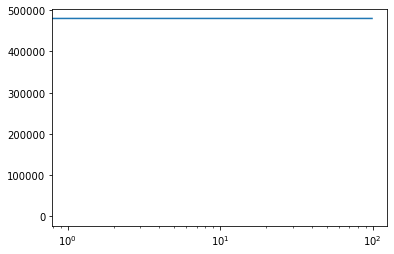

In [161]:
plt.plot(time, ms)
#plt.yscale('log')
plt.xscale('log')

In [172]:
def mag(m0, meq, t, tau):
    m = meq + (m0-meq)*np.exp(-t/tau)
    return m

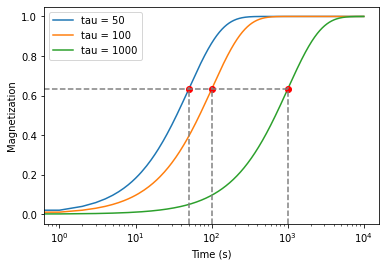

In [236]:
ms = []

time = np.arange(0,10000) 
mag_1 = [mag(0,1,t,50) for t in time]
mag_2 = [mag(0,1,t,100) for t in time]
mag_3 = [mag(0,1,t,1000) for t in time]

plt.plot(time, mag_1, label = 'tau = 50')
plt.plot(50, mag(0,1,50,50), 'ro')
plt.plot(time, mag_2, label = 'tau = 100')
plt.plot(100, mag(0,1,100,100), 'ro')
plt.plot(time, mag_3, label = 'tau = 1000')
plt.plot(1000, mag(0,1,1000,1000), 'ro')

plt.axhline(mag(0,1,1000,1000), 0, 0.73, ls = '--', c = 'gray')

plt.axvline(50, 0, mag(0,1,50,50), ls = '--', c = 'gray')
plt.axvline(100, 0, mag(0,1,100,100), ls = '--', c = 'gray')
plt.axvline(1000, 0, mag(0,1,1000,1000), ls = '--', c = 'gray')


plt.xscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Magnetization')
plt.legend()
plt.show()
    
